### データ理解

In [281]:
classes = {
    0 : '0',
    1 : '1',
}
classes

{0: '0', 1: '1'}

In [282]:
import tensorflow as tf

x_train = tf.constant(
    [

        [
            [1, 1, 1, 1, 1],
            [1, 0, 0, 0, 1],
            [1, 0, 0, 0, 1],
            [1, 0, 0, 0, 1],
            [1, 1, 1, 1, 1],
        ],
        [
            [0, 0, 1, 0, 0],
            [0, 0, 1, 0, 0],
            [0, 0, 1, 0, 0],
            [0, 0, 1, 0, 0],
            [0, 0, 1, 0, 0],
        ],
    ]
)

In [283]:
x_train.shape

TensorShape([2, 5, 5])

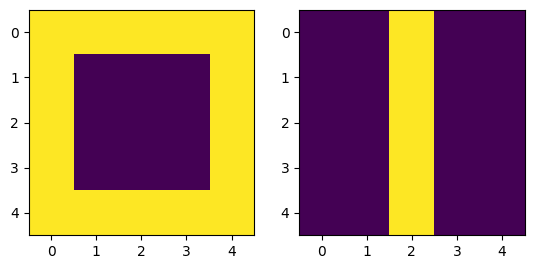

In [284]:
import matplotlib.pyplot as plt

words = x_train.shape[0]

for i in range(words):
    plt.subplot(1, words, i+1)
    plt.imshow(x_train[i])
plt.show()

In [285]:
y_train = tf.constant([0., 1.])

### モデル構築

In [286]:
class Model(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.flatten = tf.keras.layers.Flatten()
        self.fc1 = tf.keras.layers.Dense(32)
        self.fc2 = tf.keras.layers.Dense(32)
        self.fc3 = tf.keras.layers.Dense(32)
        self.fc4 = tf.keras.layers.Dense(2)

    def call(self, x):
        x = self.flatten(x)
        x = tf.nn.relu(self.fc1(x))
        x = tf.nn.relu(self.fc2(x))
        x = tf.nn.relu(self.fc3(x))
        x = tf.nn.softmax(self.fc4(x))
        print(x)
        return x

In [287]:
model = Model()
model(x_train)

tf.Tensor(
[[0.56727195 0.43272805]
 [0.6504157  0.34958425]], shape=(2, 2), dtype=float32)


<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0.56727195, 0.43272805],
       [0.6504157 , 0.34958425]], dtype=float32)>

### ハイパーパラメータ設定

In [288]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.AdamW(learning_rate=0.001)
epochs = 100

### 訓練

In [289]:
model.compile(loss=loss_fn, optimizer=optimizer)
hist = model.fit(x_train, y_train, epochs=epochs)

Epoch 1/100
Tensor("model_39/Softmax:0", shape=(None, 2), dtype=float32)
Tensor("model_39/Softmax:0", shape=(None, 2), dtype=float32)
1/1 [==============================] - 3s 3s/step - loss: 0.8090
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 0.7701
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 0.7330
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 0.6975
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 0.6654
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 0.6362
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 0.6090
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 0.5851
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 0.5656
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 0.5464
Epoch 11/100
1/1 [==============================] - 0s 9ms/step - loss: 0.5271
Epoch 12/100

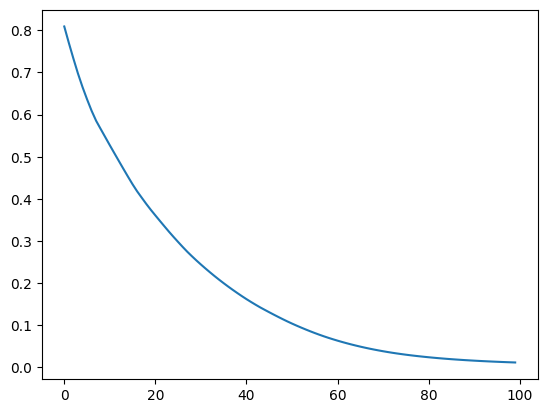

In [290]:
plt.plot(hist.history['loss'])
plt.show()

### 推論

In [291]:
x_pred = tf.constant(
    [
        [
            [1., 1., 1., 1., 1.],
            [1., 1., 0., 0., 1.],
            [1., 0., 0., 0., 1.],
            [1., 0., 0., 1., 1.],
            [1., 1., 1., 1., 1.],
        ],
        [
            [0., 1., 1., 0., 0.],
            [1., 0., 1., 0., 0.],
            [0., 0., 1., 0., 0.],
            [0., 0., 1., 0., 0.],
            [0., 0., 1., 0., 0.],
        ],
    ]
)

In [292]:
y_pred = model.predict(x_pred)
[classes[x] for x in tf.math.argmax(y_pred, axis=1).numpy()]

Tensor("model_39/Softmax:0", shape=(None, 2), dtype=float32)
1/1 [==============================] - 0s 55ms/step


['0', '1']